In [3]:
import numpy as np

np.__version__

'1.17.5'

In [18]:
x1 = np.array([5, 0, 3, 3, 7, 9])

In [19]:
x2 = x1.copy()
x2[5] = 3
x2

array([5, 0, 3, 3, 7, 3])

In [20]:
x1

array([5, 0, 3, 3, 7, 9])

In [23]:
np.ufunc

numpy.ufunc

In [26]:
L = np.random.random(100)
sum(L)

46.29061736767114

In [27]:
np.sum(L)

46.290617367671146

In [32]:
# 2.4.3
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/data/president_heights.csv')
data


[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185]


In [36]:
heights = np.array(data['height(cm)'])
print(heights)

print("平均:", heights.mean())
print("標準偏差:", heights.std())
print("最小:", heights.min())
print("最大:", heights.max())

print("25%パーセンタイル:", np.percentile(heights, 25))
print("中央値:", np.median(heights))
print("75%パーセンタイル:", np.percentile(heights, 75))

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185]
平均: 179.73809523809524
標準偏差: 6.931843442745892
最小: 163
最大: 193
25%パーセンタイル: 174.25
中央値: 182.0
75%パーセンタイル: 183.0


Text(0, 0.5, 'number')

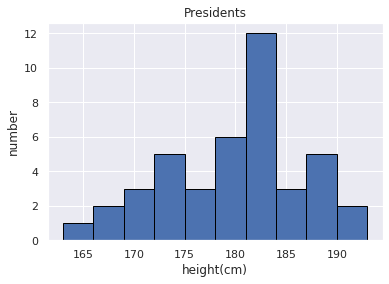

In [44]:
import matplotlib.pyplot as plt
import seaborn

seaborn.set()

# plt.hist(heights)
plt.hist(heights, edgecolor='black')
plt.title('Presidents')
plt.xlabel('height(cm)')
plt.ylabel('number')

In [48]:
# np.histogram??

In [58]:
x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x, 3)

array([2, 1, 3, 4, 6, 5, 7])

In [65]:
X = np.random.rand(10, 2)
X

array([[0.44776938, 0.38580445],
       [0.27259363, 0.17304966],
       [0.86537693, 0.37822826],
       [0.03140875, 0.86146187],
       [0.15259298, 0.47612161],
       [0.9355497 , 0.30071555],
       [0.84963962, 0.27663986],
       [0.31743344, 0.0580108 ],
       [0.0843871 , 0.74610527],
       [0.35056984, 0.16998548]])

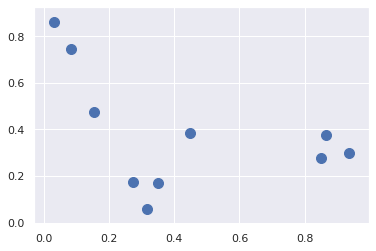

In [68]:
import matplotlib.pyplot as plt
import seaborn
seaborn.set()
plt.scatter(X[:, 0], X[:, 1], s=100)

In [70]:
pd.__version__

'0.25.3'

In [73]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [76]:
# data.values
data.index

RangeIndex(start=0, stop=4, step=1)

In [78]:
data[1:3]

1    0.50
2    0.75
dtype: float64

In [79]:
birth = pd.read_csv('https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv')
birth

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
...,...,...,...,...,...
15542,2008,10,NaN,M,183219
15543,2008,11,NaN,F,158939
15544,2008,11,NaN,M,165468
15545,2008,12,NaN,F,173215


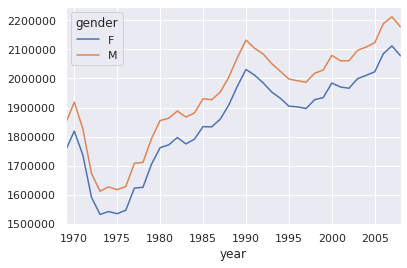

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
birth.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()

In [89]:
!pip install pandas_datareader

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
     |████████████████████████████████| 107 kB 4.0 MB/s eta 0:00:01


In [94]:
from pandas_datareader import data

yahoo = data.DataReader('GOOG', start='2004', end='2016', data_source='yahoo')
yahoo.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813286,49.982655,44871300.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942800.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342800.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239193,15319700.0,52.239193
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232100.0,52.802086


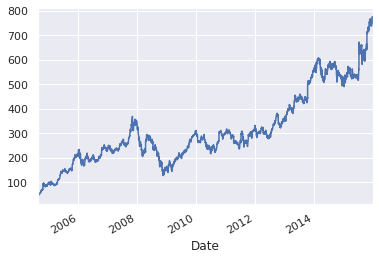

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
yahoo = yahoo['Close']
yahoo.plot()

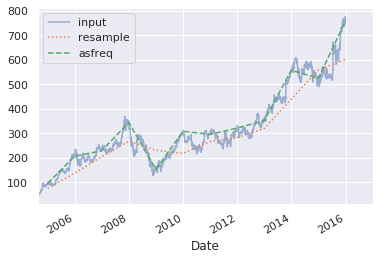

In [102]:
yahoo.plot(alpha=0.5, style='-')
yahoo.resample('BA').mean().plot(style=':')
yahoo.asfreq('BA').plot(style='--')
plt.legend(['input', 'resample', 'asfreq'], loc='upper left')